## This notebook explains how to fit a polynomial model to data using the **least squares** method

---

Lets say we start with our data points:

$\boldsymbol{X} =[x_1,x_2,...,x_N]^T$

$\boldsymbol{T} =[t_1,t_2,...,t_N]^T$

$\boldsymbol{Y} =[y_1,y_2,...,y_N]^T$

- \( X \): input observations (independent variable)
- \( T \): target values (dependent variable)
- \( Y \): estimated values predicted by the model

### We assume that the relationship between \( x \) and \( t \) can be modeled by a polynomial of degree \( M \):

$y(x,\boldsymbol{W})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$

$\boldsymbol{W} =[w_1,w_2,...,w_M]^T$

$\boldsymbol{W}$, Weights (*i.e.*, what our model learns)

### To measure how well the polynomial fits the data, we use the **sum of squared errors** (quadratic cost function):

$E(\boldsymbol{W})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{W})-t_n\}^2$

The goal is to find \( W \) that minimizes \( E(W) \).

### Computing the derivative of the cost function and making it equal to zero, we can find the vector **W*** that minimizes the error:
$ \boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A})^{-1}\boldsymbol{A} ^T\boldsymbol{T}$

Where **A** is defined by:

$$\boldsymbol{A} = \begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^M \\
    1 & x_{2} & x_{2}^2 & \dots  & x_{2}^M \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{N} & x_{N}^2 & \dots  & x_{N}^M
\end{bmatrix}$$

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 

Creating Data Set

In [2]:
noise = 0.2 

N = 25
x = np.linspace(0, 1, N) 
y_noiseless = np.sin(2*np.pi*x) 
y = y_noiseless + np.random.normal(0, noise, N)

Plot entire data set with and without noise

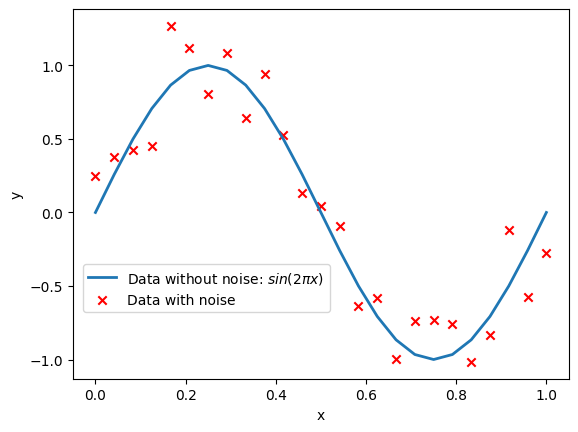

In [3]:
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Data without noise: $sin(2 \pi x)$')
plt.scatter(x,y,color ='red', marker = 'x', label = r'Data with noise')
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
np.random.seed(seed = 2)
indexes = np.arange(N, dtype =int)
np.random.shuffle(indexes)

train_size = 15
val_size = 5
test_size = 5

# Training set, validation set and test set are created by slicing the shuffled indexes array

aux = indexes[:train_size]
aux = np.sort(aux)
x_train = x[aux]
y_train = y[aux]

aux = indexes[train_size: train_size + val_size]
aux = np.sort(aux)
x_val= x[aux]
y_val = y[aux]

aux = indexes[-test_size:]
aux = np.sort(aux)
x_test = x[aux]
y_test = y[aux]

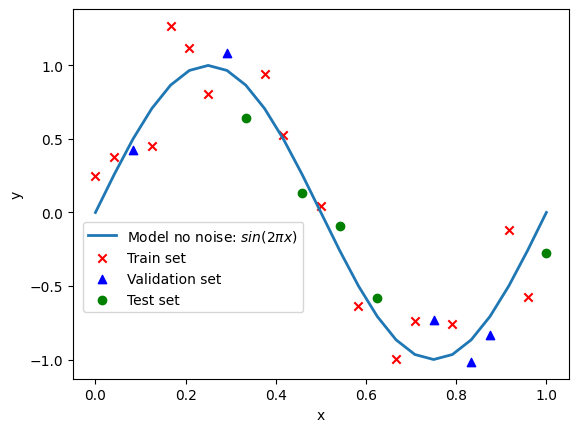

In [5]:
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Model no noise: $sin(2 \pi x)$')
plt.scatter(x_train,y_train,color ='red', marker = 'x', label = "Train set")
plt.scatter(x_val,y_val,color = 'blue',marker = '^' , label = "Validation set")
plt.scatter(x_test,y_test,color = 'green', marker = 'o', label = "Test set")
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()